### Excercise 1

#read image opencv-logo
#display shape and size of the image

### Answer

Shape of Image: (739, 600, 3)
Image Height: 739
Image Width: 600
Number of Channels: 3


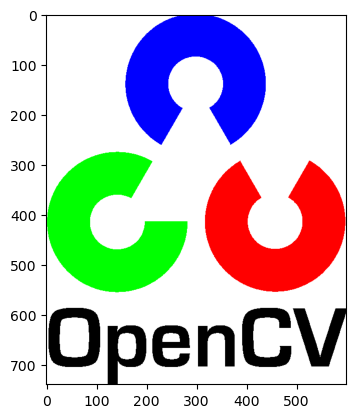

In [1]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Image
image = cv2.imread('opencv-logo.png') 
print("Shape of Image: {}".format(image.shape))

# Assigning dimension values 
height = image.shape[0]
width = image.shape[1]
channels = image.shape[2]
 
print('Image Height: {}'.format(height))
print('Image Width: {}'.format(width))
print('Number of Channels: {}'.format(channels))
plt.imshow(image);

### Excercise 2

#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image
#Similarly create a numpy array on ones with above dimensions and display the white image

### Answer

In [2]:
# Setting the Height and Width (dimensions) for displaying Black and White Images
height = 150
width = 200

black_img = np.zeros((height, width, 3), dtype=np.uint16)
white_img = np.ones(shape=(height,width, 3),dtype=np.int16) * 255

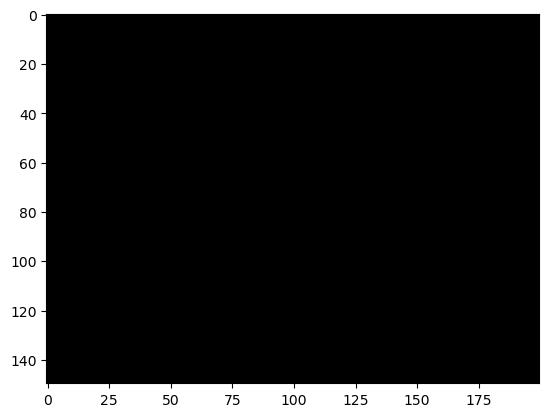

In [3]:
# Plotting Black image
plt.imshow(black_img);

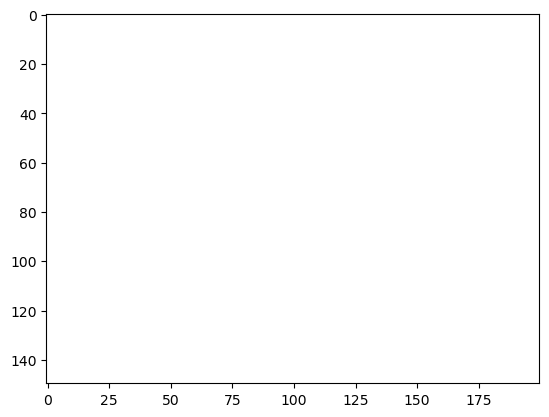

In [4]:
# Plotting White image
plt.imshow(white_img);

### Excercise 3

#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space

### Answer

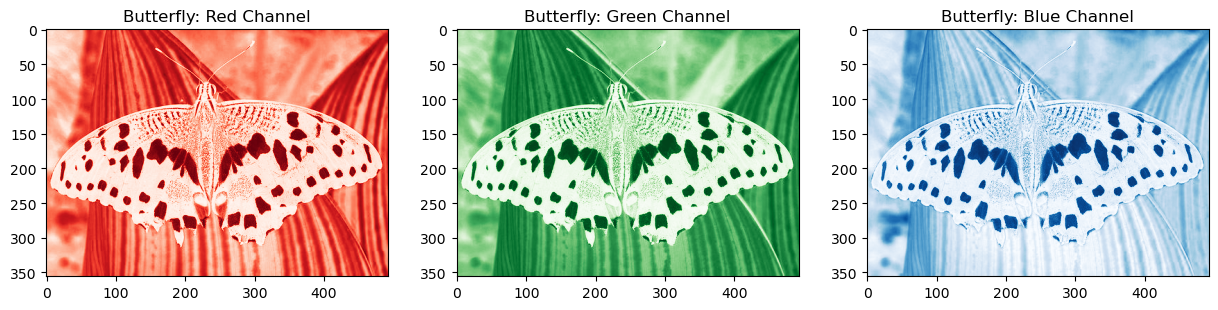

In [5]:
# Load the Butterfly image
b_image = cv2.imread('butterfly.jpg')

# Convert the image from BGR to RGB, as cv2/openCV reads image in BGR
b_rgb = cv2.cvtColor(b_image, cv2.COLOR_BGR2RGB)

# Spliting the Butterfly image into R,G,B channels
r, g, b = cv2.split(b_rgb)

# Plotting the R, G, and B channels using Matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Butterfly: Red Channel')
plt.imshow(r, cmap='Reds')

plt.subplot(132)
plt.title('Butterfly: Green Channel')
plt.imshow(g, cmap='Greens')

plt.subplot(133)
plt.title('Butterfly: Blue Channel')
plt.imshow(b, cmap='Blues')
plt.show();

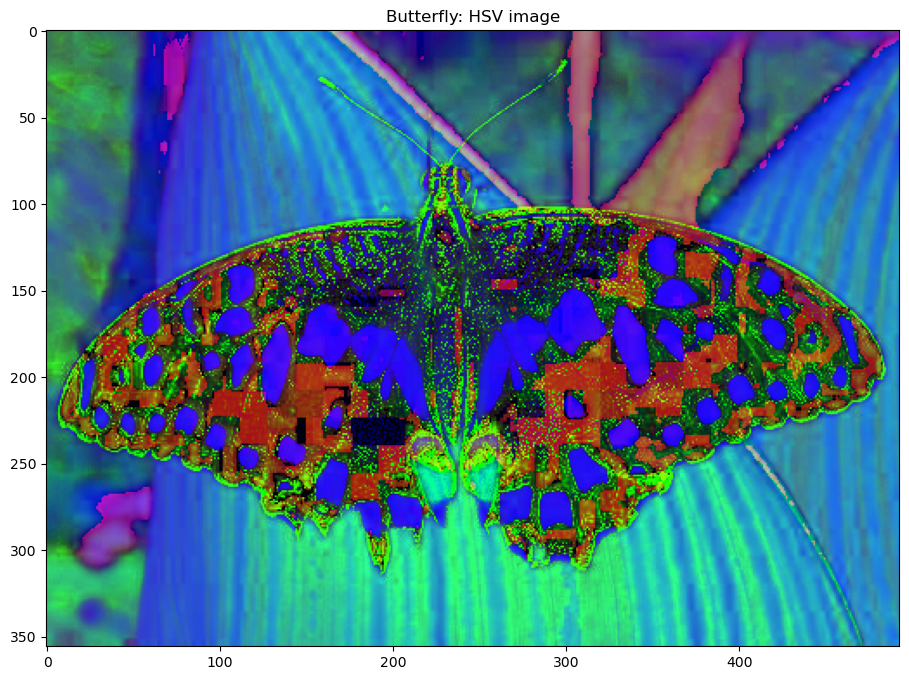

In [6]:
# Convert the RGB image to HSV
b_hsv = cv2.cvtColor(b_rgb, cv2.COLOR_RGB2HSV)

# Display the HSV image
plt.figure(figsize=(12, 8))
plt.imshow(b_hsv)
plt.title('Butterfly: HSV image')
plt.show();

### Excercise 4

#create a 5 by 5 array where every number is a 10
#run the cell below to create an array of random numbers and see if you can figure out how it works.
#what are the largest and smalled values in this array?
#use PIL and matplotlib to read and display the any image of your choice from the given images.
#convert the image to a NumPy Array
#use slicing to set the RED and GREEN channels of the picture to 0, then use imshow() to show the isolated blue channel

### Answer

In [7]:
# Crearing a 5X5 array with every element as 10
array1 = np.full((5, 5), 10)
print(array1)

[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


In [8]:
# Creating a random array
random_array = np.random.randint(1, 5, (5,5))

# Finding the largest and Smallest element in an array
largest = np.max(random_array)
smallest = np.min(random_array)

print("Random Array: \n",random_array)
print("Largest Element: {}".format(largest))
print("Smallest Element: {}".format(smallest))

Random Array: 
 [[4 1 3 1 3]
 [1 4 2 2 2]
 [3 4 3 3 3]
 [1 2 1 1 4]
 [2 4 1 3 2]]
Largest Element: 4
Smallest Element: 1


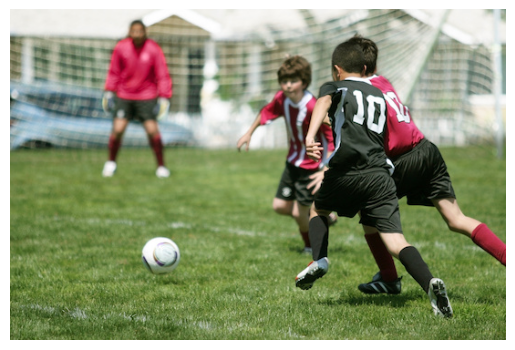

In [9]:
# PIL and Matplotlib to read, display, and manipulate an image.
!pip install pillow
from PIL import Image

p_img = Image.open('players.jpg')
plt.imshow(p_img)
plt.axis('off')
plt.show();

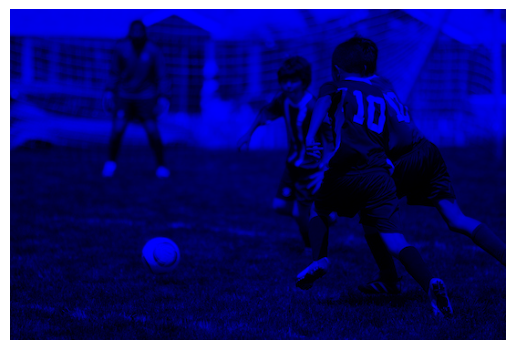

In [10]:
image_array = np.array(p_img)
blue_Channel = np.copy(image_array)

# Set the RED and GREEN channels to 0
blue_Channel[:, :, 0] = 0
blue_Channel[:, :, 1] = 0

# Display the isolated BLUE channel
plt.imshow(blue_Channel)
plt.axis('off')
plt.show()

### Excercise 5

#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST

### Answer

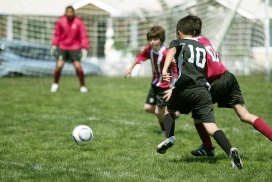

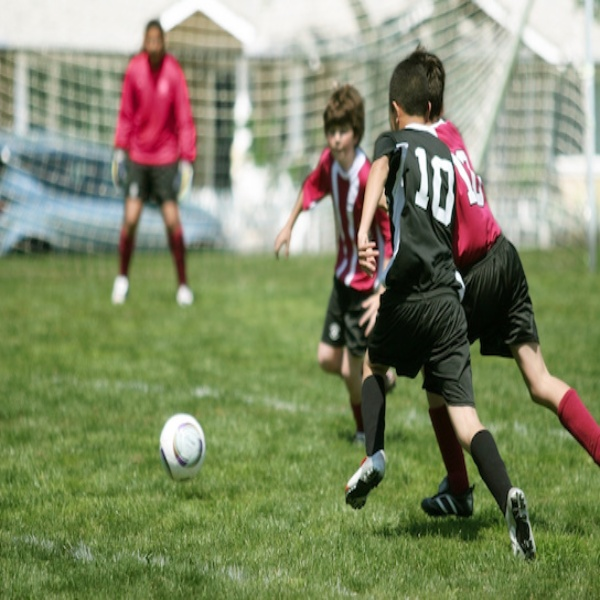

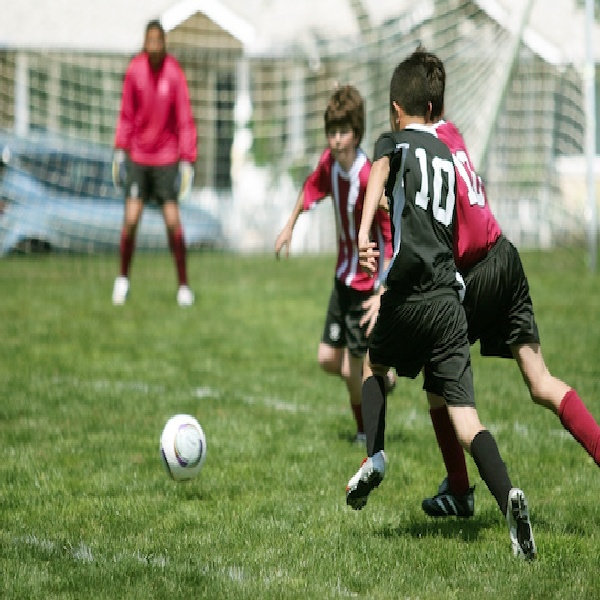

In [11]:
# Loading the Players Image
foot_players = cv2.imread('players.jpg')

# a) half the image using dim=(0,0), fx=0.5, fy=0.5
players_half = cv2.resize(foot_players, dsize=None, fx=0.5, fy=0.5)

# b) Stretch the image to 600x600
players_stretched = cv2.resize(foot_players, (600, 600))

# c) Stretch the image to 600x600 using cv2.INTER_NEAREST interpolation
players_interpolation = cv2.resize(foot_players, (600, 600), interpolation=cv2.INTER_NEAREST)

# Display the image in a Jupyter Notebook
from IPython.display import Image, display, HTML

# Plotting the Images
display(HTML("<h4>Half Image</h4>"))
display(Image(data=cv2.imencode('.jpg', players_half)[1]))
display(HTML("<h4>Stretched Image</h4>"))
display(Image(data=cv2.imencode('.jpg', players_stretched)[1]))
display(HTML("<h4>Interpolation Image</h4>"))
display(Image(data=cv2.imencode('.jpg', players_interpolation)[1]))

### Excercise 6

#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

### Answer

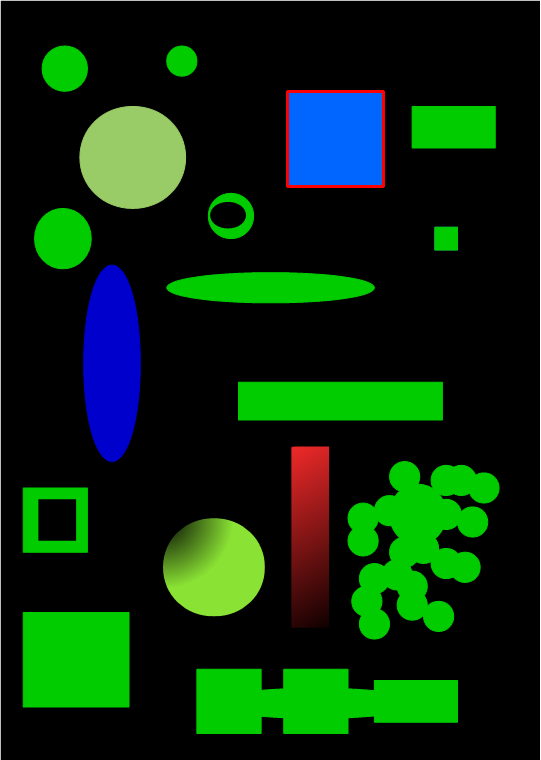

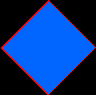

In [12]:
# Load the Blob Image and converting the image to HSV color space
blob = cv2.imread('detect_blob.png')
hsv_image = cv2.cvtColor(blob, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask to isolate the blue region
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the mask
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contours) > 0:
    # Find the largest contour (assuming it's the blue solid box)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Draw the bounding box around the blue solid box
    cv2.rectangle(blob, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Crop the ROI
    roi = blob[y:y + h, x:x + w]

    # Rotate the ROI by 45 degrees
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 0.71)
    rotated_roi = cv2.warpAffine(roi, rotation_matrix, (w, h))

    # Plotting  the Images 
    display(HTML("<h4>Drawing a box shape around the blue solid box</h4>"))
    display(Image(data=cv2.imencode('.png', blob)[1]))
    display(HTML("<h4>Rotating 45 degrees</h4>"))
    display(Image(data=cv2.imencode('.png', rotated_roi)[1]))

### Excercise 7

#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image (Hint: look into Opencv for operations)
#Finally apply canny edge detection - experiment using wide and narrow thresholds 
#(so just 2 images in total one wide and one narrow)

### Answer

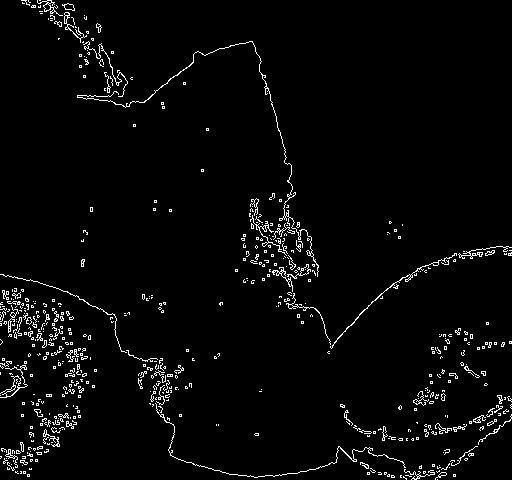

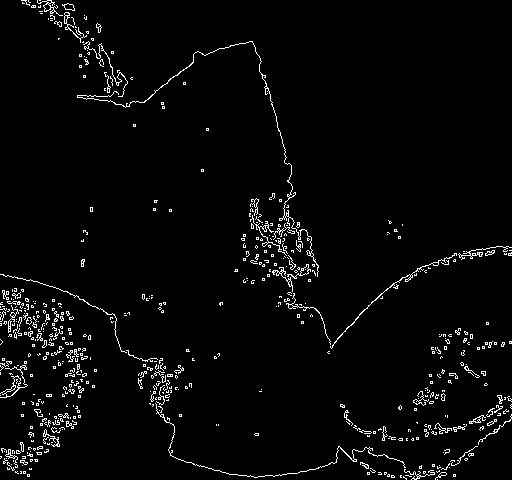

In [13]:
# Load the Thresh image
thresh_img = cv2.imread('thresh.jpg', cv2.IMREAD_GRAYSCALE)  

# Thresholding using Gaussian blur with thresholds
blurred_image = cv2.GaussianBlur(thresh_img, (5, 5), 0)
thresholded_image_low = cv2.threshold(blurred_image, 5, 255, cv2.THRESH_BINARY)[1]
thresholded_image_high = cv2.threshold(blurred_image, 55, 255, cv2.THRESH_BINARY)[1]

# Define a 5x5 kernel for dilation, erosion, opening, and closing
kernel = np.ones((5, 5), np.uint8)

# Dilation, Erosion, Opening, Closing
dilated_image = cv2.dilate(thresh_img, kernel, iterations=1)
eroded_image = cv2.erode(thresh_img, kernel, iterations=1)
opened_image = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=1)
closed_image = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel, iterations=1)

# Canny edge detection with wide and narrow thresholds
canny_wide = cv2.Canny(thresh_img, 50, 150)
canny_narrow = cv2.Canny(thresh_img, 20, 60)
    
# Plotting Canny Edge Detection -  wide and Narrow     
display(HTML("<h4>Thresh Image: Canny Wide</h4>"))
display(Image(data=cv2.imencode('.jpg', canny_wide)[1]))
display(HTML("<h4>Thresh Image: Canny Narrow</h4>"))
display(Image(data=cv2.imencode('.jpg', canny_narrow)[1]))

### Excercise 8

#read in the butterfly image
#open the chess_football image and display it in the notebook. Make sure to correct for the RGB order
#flip the image upside down and display it in the notebook.
#draw an empty RED rectangle around the butterfly and display the image in the notebook.
#draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.
#now fill in this triangle
#display the original image as well as the resultant image

### Answer

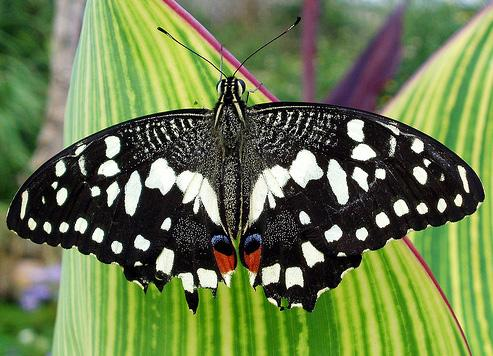

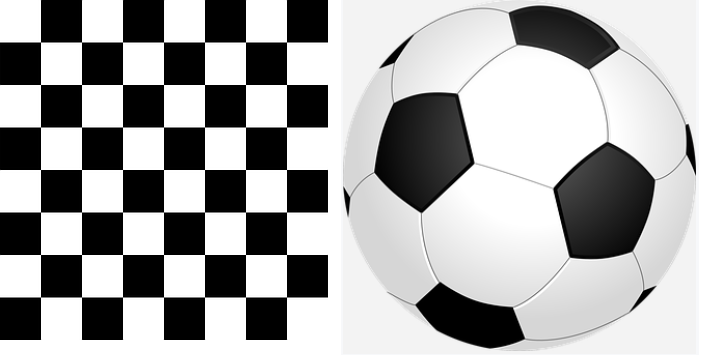

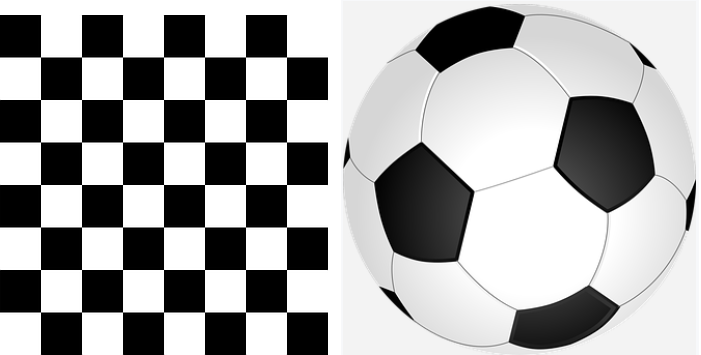

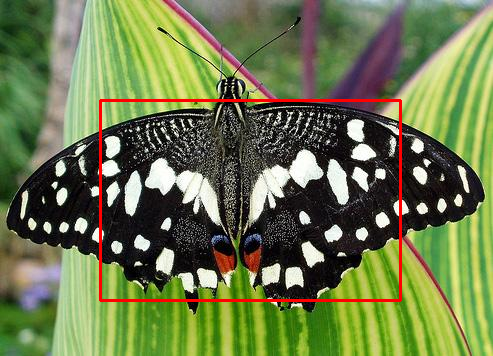

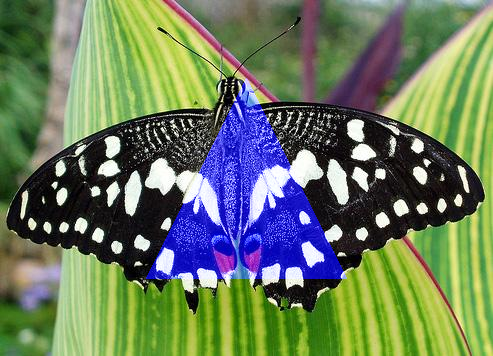

In [14]:
# Load the butterfly image
butterfly_image = cv2.imread('butterfly.jpg')

# Load the chess_football image
chess_football_image = cv2.imread('chess_football.png')
chess_football_image_rgb = cv2.cvtColor(chess_football_image, cv2.COLOR_BGR2RGB)

# Flip the chess_football image upside down
flipped_chess_football_image_rgb = np.flipud(chess_football_image_rgb)

# Create a copy of the butterfly image
butterfly_with_rectangle = butterfly_image.copy()

# Draw an empty RED rectangle around the butterfly
cv2.rectangle(butterfly_with_rectangle, (100, 100), (400, 300), (0, 0, 255), 2)

# Create a blank canvas with the same dimensions as the butterfly image
canvas_height, canvas_width, _ = butterfly_image.shape
triangle_canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

import cv2
import numpy as np
from PIL import Image
from IPython.display import display

# Load the butterfly image
butterfly_image = cv2.imread('butterfly.jpg')

# Calculate the center coordinates based on the image dimensions
canvas_height, canvas_width, _ = butterfly_image.shape
center_x = canvas_width // 2
center_y = canvas_height // 2

# Define the vertices of the blue triangle centered in the image
triangle_vertices = np.array([(center_x, center_y - 100), (center_x + 100, center_y + 100), (center_x - 100, center_y + 100)], dtype=np.int32)

# Create a blank canvas with the same dimensions as the butterfly image
triangle_canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Draw the blue triangle on the canvas
cv2.fillPoly(triangle_canvas, [triangle_vertices], (255, 0, 0))

# Overlay the butterfly image with the blue filled triangle
butterfly_with_triangle = cv2.addWeighted(butterfly_image, 1, triangle_canvas, 0.7, 0)

# Display the original butterfly image
display(Image.fromarray(cv2.cvtColor(butterfly_image, cv2.COLOR_BGR2RGB)))

# Display the original chess_football image
display(Image.fromarray(chess_football_image_rgb))

# Display the flipped chess_football image
display(Image.fromarray(flipped_chess_football_image_rgb))

# Display the butterfly image with the red rectangle
display(Image.fromarray(cv2.cvtColor(butterfly_with_rectangle, cv2.COLOR_BGR2RGB)))

# Display the corrected butterfly image with the blue filled triangle
display(Image.fromarray(cv2.cvtColor(butterfly_with_triangle, cv2.COLOR_BGR2RGB)))

### Excercise 9

#create a script that opens the picture and allows you to draw empty red circles where ever you click the RIGHT MOUSE BUTTON DOWN

### Answer

<IPython.core.display.Javascript object>


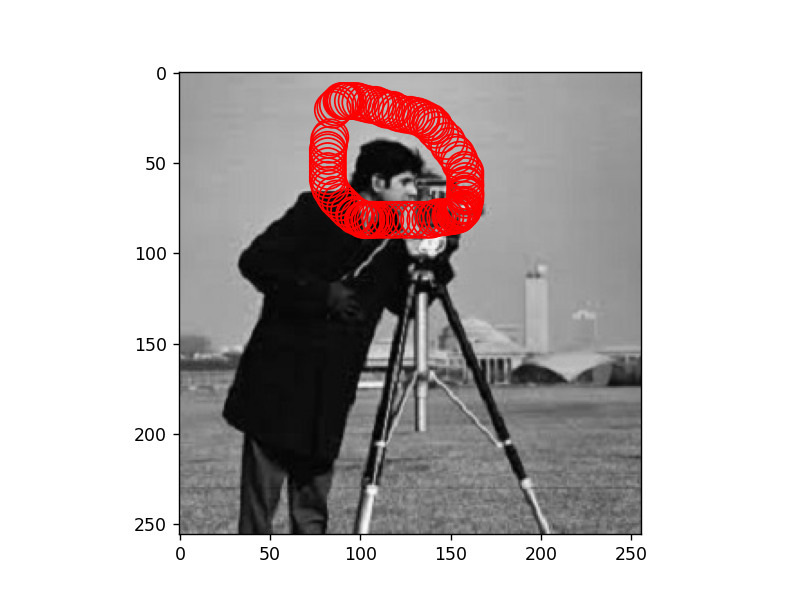

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the Cameraman image
cameraman = plt.imread('cameraman.jpg')

# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(cameraman)
drawing = False
circle_radius = 10
circle_color = 'red'

# Function to handle mouse events
def on_click(event):
    global drawing

    if event.button == 3:
        drawing = True

def on_release(event):
    global drawing

    if event.button == 3:
        drawing = False

def on_motion(event):
    if drawing:
        circle = patches.Circle((event.xdata, event.ydata), circle_radius, fill=False, edgecolor=circle_color)
        ax.add_patch(circle)
        fig.canvas.draw()

# Mouse event handlers
fig.canvas.mpl_connect('button_press_event', on_click)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)
plt.show();

### Excercise 10

#open and display the any image of your choice
#apply a binary threshold onto the image
#convert image colorspace to HSV and display the image
#create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the image (displayed in normal RGB)
#create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.
#plot the color histograms for the RED, BLUE, and GREEN channel of the image. Pay careful attention to the ordering of the channels

### Answer

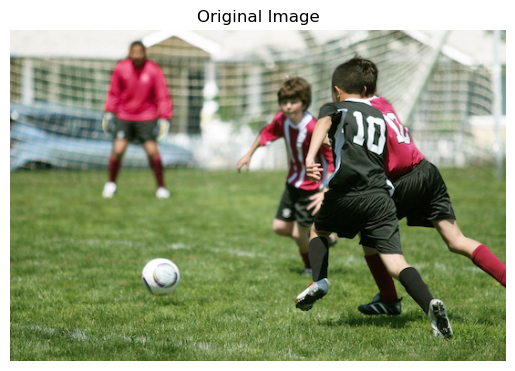

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open and display an Player image
players = cv2.imread('players.jpg')  # Replace with the path to your image
plt.imshow(cv2.cvtColor(players, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

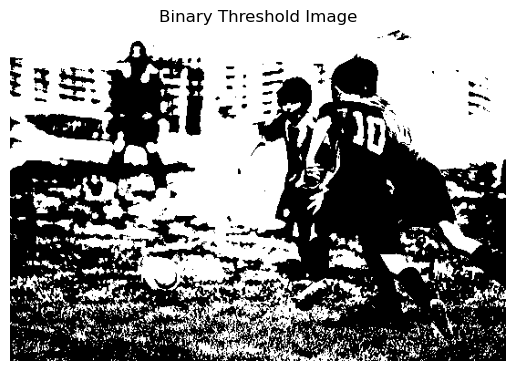

In [2]:
# Applying a binary threshold
gray_img = cv2.cvtColor(players, cv2.COLOR_BGR2GRAY)
ret, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Threshold Image')
plt.axis('off')
plt.show()

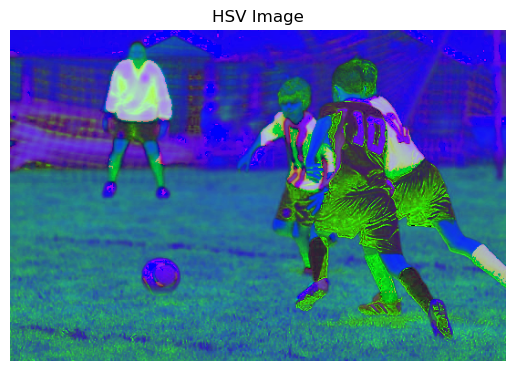

In [3]:
#convert image colorspace to HSV and display the image
hsv_img = cv2.cvtColor(players, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)
plt.title('HSV Image')
plt.axis('off')
plt.show()

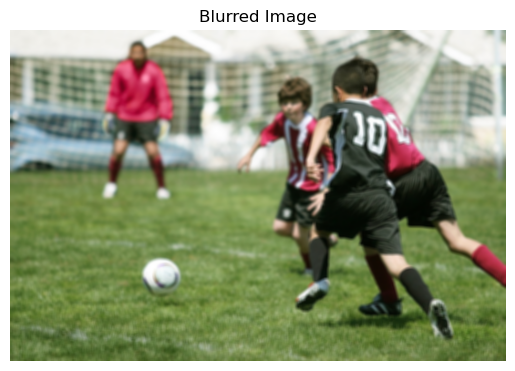

In [4]:
#create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the image (displayed in normal RGB)
kernel = (1/16) * np.array([[1, 1, 1, 1],
                            [1, 1, 1, 1],
                            [1, 1, 1, 1],
                            [1, 1, 1, 1]])
blurred_img = cv2.filter2D(players, -1, kernel)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

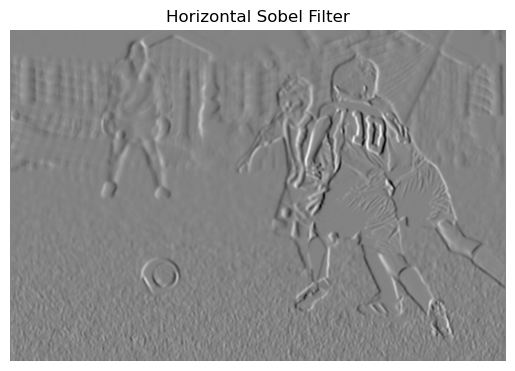

In [5]:
#create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap='gray')
plt.title('Horizontal Sobel Filter')
plt.axis('off')
plt.show()

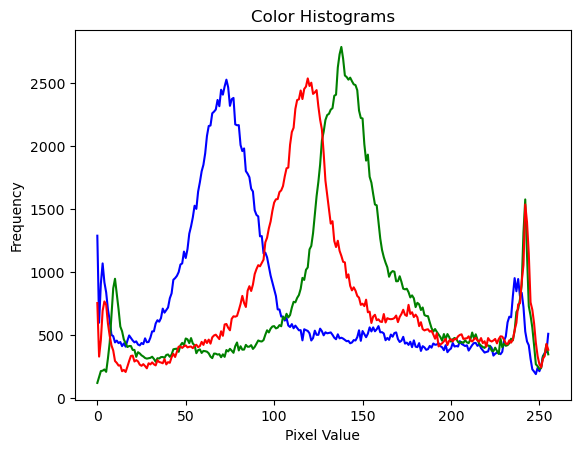

In [6]:
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([players], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Color Histograms')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()